# 从零实现GBDT

## import library

In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

## GBDT

In [2]:
class GBDT:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        # 初始预测值为目标值的均值
        y_pred = np.full(y.shape, np.mean(y))
        self.init_pred = np.mean(y)

        for _ in range(self.n_estimators):
            # 计算残差
            residual = y - y_pred

            # 使用 sklearn 的决策树拟合残差
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)

            # 更新预测值
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        # 初始化预测值
        y_pred = np.full((X.shape[0],), self.init_pred)

        # 累加每棵树的预测值
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)

        return y_pred

## 牛顿法

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
x = np.arange(0, 10, 0.1)
y = 2.0 * x ** 2 + 100 * np.sin(x) - x

In [99]:
x0 = 7

In [100]:
y0_1 = 4.0 * x0 + 100 * np.cos(x0) - 1 # 一阶导数
y0_2 = 4.0 - 100 * np.sin(x0)   # 二阶导数
y0_3 = -100 * np.cos(x0)    # 三阶
y0_4 = 100 * np.sin(x0)
y_taylor1 = float(y[x==x0]) + y0_1 * (x - x0)
y_taylor2 = y_taylor1 + 1/2 * y0_2 * (x - x0) ** 2   # 二阶泰勒展开
y_taylor3 = y_taylor2 + 1/6 * y0_3 * (x - x0) ** 3   # 三阶泰勒展开
y_taylor4 = y_taylor3 + 1/24 * y0_3 * (x - x0) ** 4   # 三阶泰勒展开

/tmp/ipykernel_67480/518560401.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_taylor1 = float(y[x==x0]) + y0_1 * (x - x0)


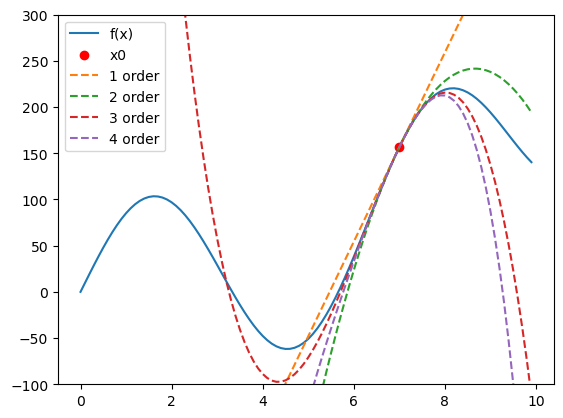

In [101]:
plt.plot(x, y, label='f(x)')
plt.scatter(x0, y[x == x0], label='x0', c='r')
plt.plot(x, y_taylor1, linestyle='--', label='1 order')
plt.plot(x, y_taylor2, linestyle='--',label='2 order')
plt.plot(x, y_taylor3, linestyle='--',label='3 order')
plt.plot(x, y_taylor4, linestyle='--',label='4 order')
plt.ylim([-100, 300])
plt.legend()
plt.show()

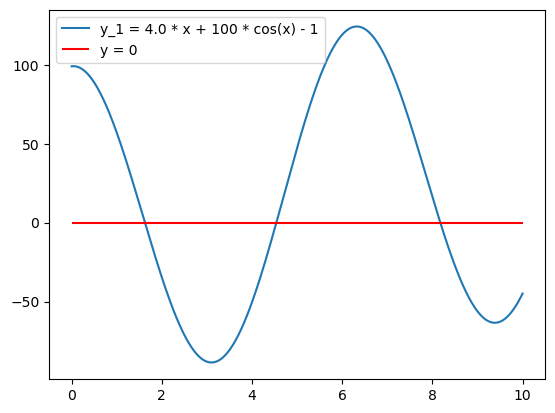

零点位置： [1.6258584852761169, 4.539937968214776, 8.176614393079815]


In [102]:
from scipy.optimize import root_scalar

# 定义函数
def f(x):
    return 4.0 * x + 100 * np.cos(x) - 1

# 在 [0, 10] 范围内求解零点
x_vals = np.linspace(0, 10, 1000)
y_vals = f(x_vals)

# 可视化函数
plt.plot(x_vals, y_vals, label="y_1 = 4.0 * x + 100 * cos(x) - 1")
plt.hlines(0, 0, 10, colors='r', label="y = 0")
plt.legend()
plt.show()

# 寻找多个零点
root_list = []
for i in range(1, len(x_vals)):
    if y_vals[i-1] * y_vals[i] < 0:  # 检测符号变化
        result = root_scalar(f, bracket=[x_vals[i-1], x_vals[i]], method='brentq')
        root_list.append(result.root)

print("零点位置：", root_list)

### 牛顿法迭代

In [107]:
target_x = 4
iter_x = [target_x, ]
for i in range(1000):
    yt_1 = 4.0 * target_x + 100 * np.cos(target_x) - 1 # 一阶导数
    yt_2 = 4.0 - 100 * np.sin(target_x)   # 二阶导数
    target_x = target_x - yt_1 / yt_2
    iter_x.append(target_x)
    if np.abs(yt_1) < 1e-12:
        break

In [108]:
target_x

4.539937968214776

In [109]:
len(iter_x)

6